# Intro
This notebook is my attempt to analyze the mass frequency of meteorite impacts over the last 130 years (roughly). I pulled the data from open source datasets at data.gov under NASA's section. https://catalog.data.gov/dataset/meteorite-landings 

In [353]:
from matplotlib import pyplot as plt

In [354]:
import numpy as np

# Importing/Cleaning the Dataset

In [355]:
#Importing data from csv_file
meteorite_landings_data = pandas.read_csv("Meteorite_Landings.csv")
meteorite_landings_data

,name,id,nametype,recclass,mass_g,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.78917, 41.5046)"


In [356]:
# takes the mass column from the dataset, renamed from mass(g) to mass_g for ease of use.
meteorite_masses = meteorite_landings_data['mass_g']
meteorite_masses

0            21.0
1           720.0
2        107000.0
3          1914.0
4           780.0
           ...   
45711       172.0
45712        46.0
45713         3.3
45714      2167.0
45715       200.0
Name: mass_g, Length: 45716, dtype: float64

In [357]:
# Finds total number of NaN values in meteorite mass_g column
total_meteorites_no_mass_record = meteorite_masses.isna().sum() # total = 131
# removes NaN values from meteorite mass_g column
meteorite_masses.dropna(inplace = True)

In [358]:
# Updated description of dataset
meteorite_masses.describe()

count    4.558500e+04
mean     1.327808e+04
std      5.749889e+05
min      0.000000e+00
25%      7.200000e+00
50%      3.260000e+01
75%      2.026000e+02
max      6.000000e+07
Name: mass_g, dtype: float64

# Visualizations

This is where I ran into an issue.  In total there were 45,585 meteorites with a recorded mass in the dataset. 25% of those meteorites were at or below 7.2g, and 75% of them were either at or below 202.6g. 

However, there were 16 asteroids that had a mass greater than 6 million grams, reaching as high as 60 million. This  proved to make visualizing size frequency a lot more difficult without sacrificing larger impacts. 

# Visualization 1: Boxplot

My first attempt was a boxplot. My thought process was:
1. Ability to see outliers while also seeing quartile range of data (<75%)

2. Customizable to highlight necessary/desired details (quartile range, median, mean, etc...)

This worked okay. It captures the range and broad frequency for the majority of majority of data. However it doesnt reveal very many details about the frequency distrubution itself.

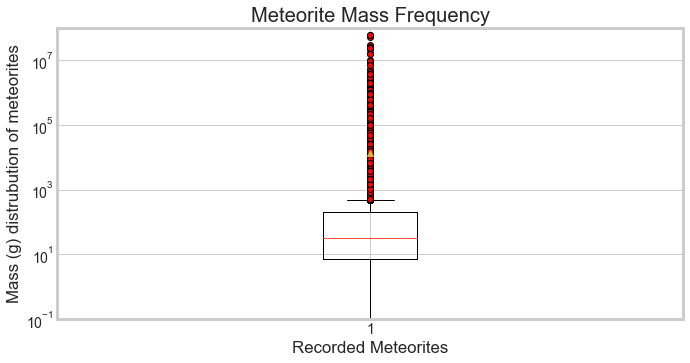

In [359]:
import seaborn as sns

#labeling
plt.title('Meteorite Mass Frequency')
plt.xlabel('Recorded Meteorites')
plt.ylabel('Mass (g) distrubution of meteorites')
plt.semilogy()

#styling
sns.set_style("whitegrid")
red_circle_outliers = dict(markerfacecolor='red', marker='o')
vertical_offset = meteorite_masses.median() * 0.05 

#creating boxplot
plt.ylim(0.1, 100000000)
boxplot = plt.boxplot(x=meteorite_masses, showmeans=True, flierprops=red_circle_outliers)

# Visualization 2: Histogram

This was my second attempt at visualization. 
I figured that histogram may give a better viewing of the frequency distrubtion, however I ran into the same issue
that I had with the small number of large outliers.

In addition, the default bins were confusing. x axis units of 6000000 in e notation isn't what I like to call easy to read. Still, a histogram seems? a better choice for visualizing the frequency distributions.

(array([4.5569e+04, 4.0000e+00, 2.0000e+00, 2.0000e+00, 4.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([       0.,  6000000., 12000000., 18000000., 24000000., 30000000.,
        36000000., 42000000., 48000000., 54000000., 60000000.]),
 <BarContainer object of 10 artists>)

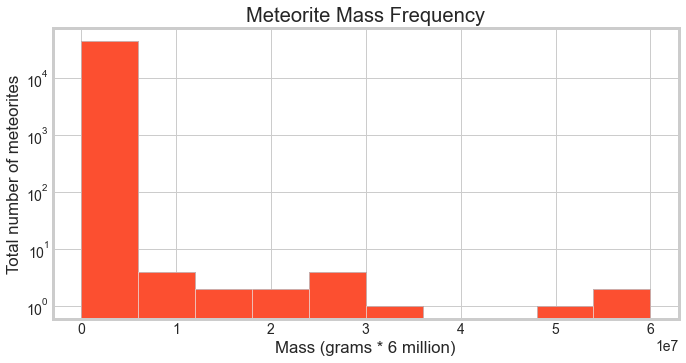

In [360]:
plt.title('Meteorite Mass Frequency')
plt.xlabel('Mass (grams * 6 million)')
plt.ylabel('Total number of meteorites')
median = 3.260000e+01
histogram = plt.hist(meteorite_masses, edgecolor='black', log=True)
plt.hist(meteorite_masses)

# Assumptions/Changes
1. I changed the column title in the dataset from mass(g) to mass_g
2. I removed an NaN values from the mass_g column
3. I assumed these visualizations made the most sense for the skewed distrbution + outliers.

# Improvement/Next Steps

1. I spent a lot of time trying to find a visualization that can account for a small amount of extremely high outliers. This meant I spent less time adding/refining visual details, and a lot more time trying to make the data visually useful in the first place.
 
2. I didn't provide a year range for my data which may have made the distrubution a little more interesting or precise. I'm also curious if growing technical prowess to detect meteorite impacts skews the date range a certain way. Only time and Metorite_Landings_notebook_2 may tell. The date range for the data would need to be parsed and updated however, since I don't think that the correct range is from 860 to 2101 A.D.

3. This took me roughly 8-12 hours without prior knowledge of juypter notebooks, pandas, matplotlib, so if everything looks amateurish, it most definitely is. However I did really like the tools/libraries and would like explore them more, so any specific tips would be appreciated.

# Conclusion:
Most meteoroids are small. But we shouldn't forget about the ones that aren't.